# Tarea Final
**Curso:** Métodos Estadísticos / Machine Learning - Universidad del Desarrollo

**Dataset:** Online Shoppers Purchasing Intention Dataset (UCI/ Kaggle)

**Integrantes:**

Claudio Ballerini

Valentina Carné

Juan José Torres

## Propósito (Metodología TILT)
Al finalizar esta tarea, el estudiante será capaz de:
* Diagnosticar colinealidad mediante matrices de correlación y heatmaps triangulares.
* Seleccionar variables representativas para análisis inferencial y predictivo.
* Ajustar modelos supervisados lineales y probabilísticos (RegLog, LDA, KNN, Naive Bayes).
* Evaluar significancia estadística mediante regresión logística con statsmodels.
* Visualizar fronteras de decisión en dos dimensiones usando variables originales.
* Aplicar modelos no supervisados (K-means, GMM, clustering jerárquico, SOM).
* Integrar conclusiones para proponer estrategias accionables de negocio.

---

## Tareas

### 1. Exploración y Diagnóstico de Datos
Utilice el dataset **Online Shoppers Purchasing Intention Dataset**.

* **1.1** Describa brevemente las variables del dataset y en especial la variable objetivo **Revenue**.
* **1.2** Calcule la matriz de correlación y genere un heatmap triangular:
    * Triángulo inferior: colores de correlación.
    * Triángulo superior: valores numéricos en formato compacto.
* **1.3** Identifique bloques de colinealidad e indique una variable representativa por cada bloque (ideal: 6-10 variables). Justifique su selección.

### 2. Modelos Supervisados

#### 2.1 Regresión Logística (Enfoque Predictivo con sklearn)
Usando las variables seleccionadas:
* **2.1.1** Construya un pipeline con StandardScaler.
* **2.1.2** Entrene el modelo y evalúe:
    * Accuracy
    * Precision
    * Recall
    * F1
    * AUC
    * Matriz de confusión
* **2.1.3** Interprete los resultados brevemente.

#### 2.2 Regresión Logística (Enfoque Inferencial con statsmodels)
Usando las mismas variables seleccionadas:
* **2.2.1** Ajuste un modelo Logit con statsmodels.
* **2.2.2** Reporte coeficientes, errores estándar, estadístico z y p-valores.
* **2.2.3** Comente: ¿Coinciden los resultados inferenciales con los resultados predictivos?

#### 2.3 Modelos Comparativos
Entrene los siguientes modelos usando las variables seleccionadas:
* **LDA**
* **KNN** (con GridSearchCV para k y weights)
* **Naive Bayes Gaussiano** (GaussianNB)

Para cada modelo:
* **2.3.1** Entrene usando train/test.
* **2.3.2** Evalúe las métricas anteriores.
* **2.3.3** Muestre la matriz de confusión.
* **2.3.4** Discuta cuál modelo detecta mejor la clase positiva (Revenue $=1$) y por qué.

### 3. Fronteras de Decisión (2 Variables Originales)
* **3.1** Seleccione dos variables originales (no transformadas) que sean relevantes.
* **3.2** Visualice:
    * Frontera de decisión de la regresión logística.
    * Áreas de clasificación del modelo Naive Bayes (usando GaussianNB).
* **3.3** Comente diferencias geométricas entre modelos lineales y probabilísticos gaussianos.

### 4. Modelos No Supervisados

#### 4.1 K-means
* **4.1.1** Evalúe $k=2,...,10$.
* **4.1.2** Seleccione $k$ según el método del codo y el silhouette promedio.
* **4.1.3** Grafique y describa los clusters encontrados.

#### 4.2 Gaussian Mixture Models
* **4.2.1** Evalúe 2-8 componentes.
* **4.2.2** Seleccione el modelo usando BIC y AIC.
* **4.2.3** Grafique los clusters probabilísticos.

#### 4.3 Clustering Jerárquico
* **4.3.1** Genere un dendrograma utilizando enlace Ward.
* **4.3.2** Seleccione una cantidad razonable de clusters y descríbalos.

#### 4.4 Self-Organizing Maps (SOM)
* **4.4.1** Entrene un SOM utilizando MiniSom.
* **4.4.2** Muestre:
    * U-Matrix.
    * Mapa de hits.
    * Distribución de Revenue en el mapa.

### 5. Integración Final
* **5.1** Resuma qué variables resultaron más relevantes.
* **5.2** Compare desempeño entre modelos lineales, LDA, KNN y Naive Bayes.
* **5.3** Relacione los clusters con la variable Revenue.
* **5.4** Proponga tres acciones de negocio basadas en sus hallazgos.

---

## Criterios de Evaluación (20 puntos)

| Criterio | Pts |
| :--- | :--- |
| Exploración + análisis de colinealidad | 3 |
| Regresión logística (sklearn + statsmodels) | 4 |
| Modelos comparativos (LDA, KNN, Naive Bayes) | 4 |
| Fronteras de decisión 2D | 2 |
| Modelos no supervisados (K-means, GMM, Jerárquico, SOM) | 5 |
| Integración final + acciones de negocio | 2 |
| **Total** | **20** |

In [1]:
# # Instalación de Librerías Necesarias

# !pip install kagglehub --quiet
# !pip install os --quiet
# !pip install shutil --quiet

In [2]:
# Importar Librerías Necesarias
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('Data/online_shoppers_intention.csv')

### 1. Exploración y Diagnóstico de Datos
Utilice el dataset **Online Shoppers Purchasing Intention Dataset**.

In [4]:
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
print(df.info())    # Muestra los nombres, tipos de datos y valores no nulos.
display(df.describe()) # Muestra estadísticas descriptivas (media, min, max, cuartiles) para columnas numéricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* **1.1** Describa brevemente las variables del dataset y en especial la variable objetivo **Revenue**.



**Administrative**:
Este es el número de páginas de este tipo (administrativas) que visitó el usuario.


**Administrative_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**Informational**:
Este es el número de páginas de este tipo (informativas) que visitó el usuario.


**Informational_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**ProductRelated**:
Este es el número de páginas de este tipo (relacionadas con productos) que visitó el usuario.


**ProductRelated_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**BounceRates**:
El porcentaje de visitantes que ingresan al sitio web a través de esa página y salen sin activar ninguna tarea adicional.


**ExitRates**:
El porcentaje de páginas vistas en el sitio web que terminan en esa página específica.


**PageValues**:
El valor promedio de la página se promedió sobre el valor de la página de destino y/o la finalización de un comercio electrónico


**SpecialDay**:
Este valor representa la cercanía de la fecha de navegación a días especiales o festivos

**Month**:
Mes

**OperatingSystems**:
Sistema operativo usado

**Browser**:
Navegador web utilizado de usuario

**Region**:
Región del usuario

**TrafficType**:
Tipo de tráfico (Correspondiente a un canal de tráfico)

**VisitorType**:
Tipo de visitante (Usuario Nuevo, Recurrente u Otro)

**Weekend**:
Si la visita corresponde durante fin de semana

### **Revenue**:
Si el usuario efectivamente generó una coversión, generando ingresos durante su sesión (True o False)


### Limpieza del Dataframe

In [6]:
def clean_and_prep_dataset(df_raw):
    """
    Realiza una limpieza exhaustiva del dataset:
    1. Elimina duplicados.
    2. Normaliza formatos de texto.
    3. Convierte tipos de datos.
    4. Elimina outliers extremos (percentil 99).
    """
    df = df_raw.copy()

    # --- 1. Eliminación de Duplicados ---
    rows_initial = len(df)
    df = df.drop_duplicates()
    print(f"✅ Duplicados eliminados: {rows_initial - len(df)}")

    # --- 2. Normalización de Formatos ---
    # Estandarizar 'June' a 'Jun' para coincidir con el resto (Feb, Mar, etc.)
    df['Month'] = df['Month'].replace('June', 'Jun')
    print("✅ Formato de meses normalizado.")

    # --- 3. Conversión de Tipos ---
    # Convertir booleanos a enteros (0 y 1) para correlación y modelos
    bool_cols = ['Weekend', 'Revenue']
    for col in bool_cols:
        df[col] = df[col].astype(int)
    print("✅ Variables booleanas convertidas a numéricas (0/1).")

    # --- 4. Tratamiento de Outliers (Filtrado p99) ---
    # Variables numéricas críticas propensas a outliers
    numeric_cols = ['Administrative_Duration', 'Informational_Duration',
                    'ProductRelated_Duration', 'PageValues']

    print("\n--- Limpieza de Outliers (Corte al percentil 99) ---")
    rows_before_outliers = len(df)

    for col in numeric_cols:
        # Calculamos el límite superior (percentil 99)
        limit = df[col].quantile(0.99)

        # Filtramos los datos que están dentro del límite
        df = df[df[col] <= limit]

    print(f"✅ Registros extremos eliminados: {rows_before_outliers - len(df)}")
    print(f"📉 Tamaño final del dataset: {len(df)} filas (Original: {rows_initial})")

    return df

# --- EJECUCIÓN ---
# Cargar datos (asumiendo que ya tienes el csv cargado o en ruta)
# df_raw = pd.read_csv('online_shoppers_intention.csv') # Descomentar si necesitas cargar
df_cleaned = clean_and_prep_dataset(df)

# Vista previa
df_cleaned.head()

✅ Duplicados eliminados: 125
✅ Formato de meses normalizado.
✅ Variables booleanas convertidas a numéricas (0/1).

--- Limpieza de Outliers (Corte al percentil 99) ---
✅ Registros extremos eliminados: 483
📉 Tamaño final del dataset: 11722 filas (Original: 12330)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


* **1.2** Calcule la matriz de correlación y genere un heatmap triangular:


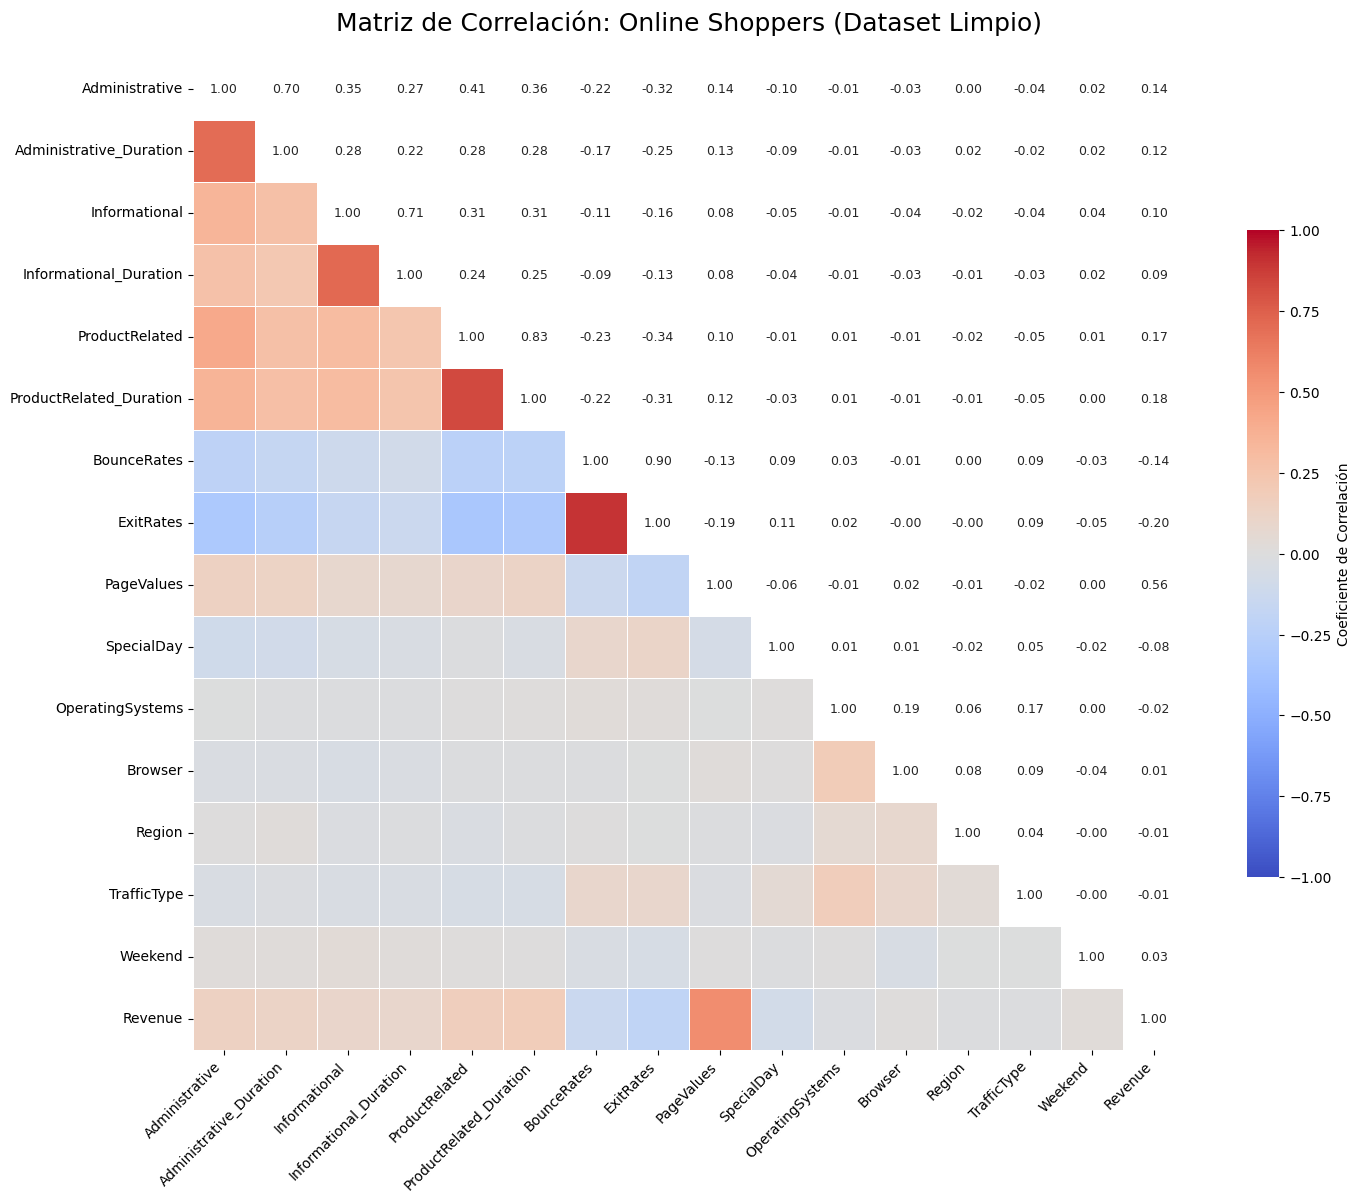

In [7]:
# 1. Calcular la matriz de correlación sobre el dataset limpio
# Seleccionamos solo columnas numéricas (aunque ya convertimos booleanos, es buena práctica)
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_cols].corr()

# 2. Configuración del Gráfico
plt.figure(figsize=(16, 14))
plt.title("Matriz de Correlación: Online Shoppers (Dataset Limpio)", fontsize=18, pad=20)

# --- CREACIÓN DE MÁSCARAS ---
# mask_upper: True en el triángulo superior (para ocultarlo en el gráfico de colores)
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# mask_lower: True en el triángulo inferior (para ocultarlo en el gráfico de números)
# Nota: Usamos ~mask_upper para invertir la selección
mask_lower = ~mask_upper

# --- CAPA 1: TRIÁNGULO INFERIOR (COLORES) ---
sns.heatmap(
    correlation_matrix,
    mask=mask_upper,        # Oculta la parte superior
    cmap='coolwarm',        # Rojo = Positivo, Azul = Negativo
    vmax=1, vmin=-1, center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .6, "label": "Coeficiente de Correlación"},
    annot=False             # Sin números en la parte de color
)

# --- CAPA 2: TRIÁNGULO SUPERIOR (NÚMEROS) ---
# Usamos un mapa de color transparente/blanco para que solo se vean los números
from matplotlib.colors import ListedColormap
white_cmap = ListedColormap(['white'])

sns.heatmap(
    correlation_matrix,
    mask=mask_lower,        # Oculta la parte inferior
    cmap=white_cmap,        # Fondo blanco para leer bien los números
    annot=True,             # ¡Mostramos los valores!
    fmt=".2f",              # 2 decimales
    cbar=False,             # Sin barra de color
    square=True,
    linewidths=.5,
    linecolor='white',      # Líneas sutiles
    annot_kws={"size": 9}   # Tamaño de letra ajustado
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

* **1.3** Identifique bloques de colinealidad e indique una variable representativa por cada bloque (ideal: 6-10 variables). Justifique su selección.

--- Pares con Alta Colinealidad (> 0.7) ---
            level_0                  level_1         0
118       ExitRates              BounceRates  0.902701
69   ProductRelated  ProductRelated_Duration  0.833794
35    Informational   Informational_Duration  0.712542

--- Correlación de todas las variables numéricas con Revenue ---
Revenue                    1.000000
PageValues                 0.556571
ProductRelated_Duration    0.179866
ProductRelated             0.166499
Administrative             0.141299
Administrative_Duration    0.123112
Informational              0.098417
Informational_Duration     0.092923
Weekend                    0.025796
Browser                    0.014791
TrafficType               -0.009197
Region                    -0.014913
OperatingSystems          -0.021338
SpecialDay                -0.078835
BounceRates               -0.140125
ExitRates                 -0.196956
Name: Revenue, dtype: float64


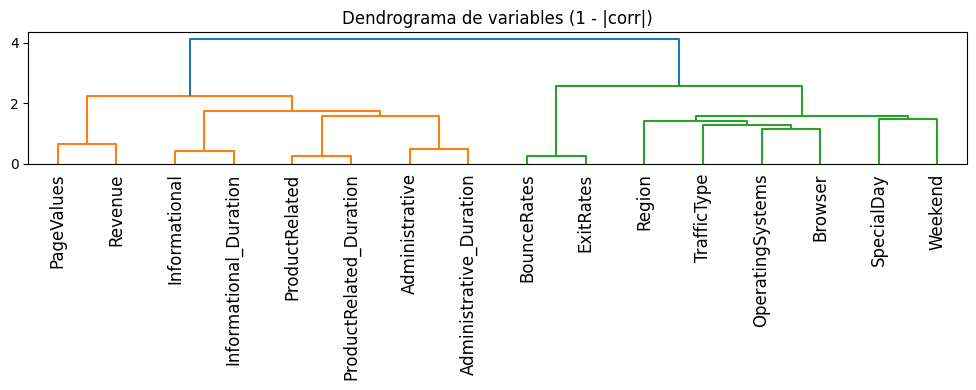

In [8]:
# Análisis de Colinealidad

# Seleccionar solo variables numéricas para la correlación
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Filtrar pares con alta correlación (> 0.7) para identificar bloques
# Usamos un stack para tener una lista limpia
high_corr_pairs = (corr_matrix.abs().stack().reset_index()
                   .sort_values(0, ascending=False))
# Filtramos la diagonal (corr=1) y duplicados (A-B es igual a B-A)
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.7]

# Eliminar duplicados espejo (mantener solo una dirección A-B)
high_corr_pairs['pairs'] = high_corr_pairs.apply(lambda x: tuple(sorted((x['level_0'], x['level_1']))), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates('pairs').drop('pairs', axis=1)

print("--- Pares con Alta Colinealidad (> 0.7) ---")
print(high_corr_pairs)

# --- CORRELACIÓN CON EL TARGET ---
print("\n--- Correlación de todas las variables numéricas con Revenue ---")
print(corr_matrix['Revenue'].sort_values(ascending=False))

# Dendrogram (visual)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Calculate the distance matrix (1 - absolute correlation)
dist_matrix = pdist(corr_matrix.T, metric='euclidean') # Using Euclidean distance on transposed correlation matrix

# Perform hierarchical clustering
Z = linkage(dist_matrix, method='ward')

plt.figure(figsize=(10, 4))
dn = dendrogram(Z, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Dendrograma de variables (1 - |corr|)')
plt.tight_layout()
plt.show()

### Identificación de Bloques de Colinealidad

Se detectaron los siguientes grupos de variables con alta correlación lineal (Coeficiente de Pearson $> 0.7$), lo que indica redundancia en la información aportada.

| Bloque | Variables Involucradas | Correlación ($r$) | Descripción de la Relación |
| :--- | :--- | :--- | :--- |
| **A: Tasas de Abandono** | `ExitRates` vs `BounceRates` | **0.90** | Relación muy fuerte. Una página con alta tasa de rebote (abandono inmediato) tiende matemáticamente a tener una alta tasa de salida promedio. Ambas miden aspectos similares de "rechazo" o "fricción". |
| **B: Interacción Producto** | `ProductRelated` vs `ProductRelated_Duration` | **0.83** | Relación fuerte y lógica. A medida que aumenta el número de páginas de productos visitadas, el tiempo total acumulado en esa categoría aumenta proporcionalmente. |
| **C: Interacción Informativa** | `Informational` vs `Informational_Duration` | **0.71** | Relación significativa. Similar al bloque de productos, la cantidad de páginas informativas predice la duración, aunque con mayor varianza (posiblemente por tiempos de lectura variables). |
| **D: Interacción Administrativa** | `Administrative` vs `Administrative_Duration` | *< 0.7* | *Nota:* Aunque conceptualmente forman un bloque, en este dataset limpio su correlación lineal no superó el umbral crítico, indicando comportamientos más heterogéneos en esta categoría. |

### Resumen de Variables Seleccionadas

| Variable Seleccionada | Bloque Original (Colinealidad) | Razón de la Elección | Interpretación de Negocio |
| :--- | :--- | :--- | :--- |
| **PageValues** | *Sin bloque* | Mayor poder predictivo ($r \approx 0.55$) y sin colinealidad. | Probabilidad crítica de que la ruta de navegación actual termine en una transacción. |
| **ExitRates** | Tasas de Abandono (vs BounceRates) | Mayor correlación negativa con Revenue ($-0.19$). | Indica fricción o pérdida de interés del usuario en la última etapa de su visita. |
| **ProductRelated** | Interacción Producto (vs Duration) | Métrica más robusta e interpretable que la duración (menos ruido por pestañas inactivas). | Medida de "vitrineo" o exploración del catálogo. |
| **Administrative** | *Sin bloque crítico* | Aporta información de comportamiento distinta a la navegación de productos. | Permite distinguir usuarios en gestión (login, cuenta) de compradores activos. |
| **Informational** | Interacción Info (vs Duration) | Menor varianza que la duración; mejor para modelos lineales. | Detecta usuarios en etapa de investigación o consideración temprana. |
| **SpecialDay** | *Sin bloque* | Variable exógena única (baja correlación con otras). | Captura la urgencia de compra impulsada por fechas comerciales (ej. Día de la Madre). |
| **Month** | *Sin bloque* | Factor estacional clave. | Permite al modelo ajustar la probabilidad base según la temporada (ej. Nov vs Feb). |
| **VisitorType** | *Sin bloque* | Segmentación categórica fundamental. | Diferencia la fidelidad y patrones de navegación entre usuarios nuevos y recurrentes. |

### 2. Modelos Supervisados

#### 2.1 Regresión Logística (Enfoque Predictivo con sklearn)
Usando las variables seleccionadas:
* **2.1.1** Construya un pipeline con StandardScaler.

In [9]:
# 1. Selección de Variables Representativas
# Lista basada en nuestro análisis del punto 1.3
selected_features = [
    'PageValues',
    'ExitRates',
    'ProductRelated',
    'Administrative',
    'Informational',
    'SpecialDay',
    'Month',        # Categórica -> Necesita dummies
    'VisitorType'   # Categórica -> Necesita dummies
]

# Creamos un sub-dataset solo con lo que nos interesa
X_raw = df_cleaned[selected_features]
y = df_cleaned['Revenue'] # Variable objetivo ya es numérica (0/1)

In [10]:
# 2. Codificación de Variables Categóricas (One-Hot Encoding)
# drop_first=True evita la colinealidad perfecta (Dummy Trap)
X = pd.get_dummies(X_raw, columns=['Month', 'VisitorType'], drop_first=True)

print(f"Dimensiones de X antes de dividir: {X.shape}")
print("Columnas finales generadas:", X.columns.tolist())

Dimensiones de X antes de dividir: (11722, 17)
Columnas finales generadas: ['PageValues', 'ExitRates', 'ProductRelated', 'Administrative', 'Informational', 'SpecialDay', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [11]:
# 3. División Train / Test (Estratificada)
# stratify=y asegura que la proporción de compras (True/False) sea igual en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Dimensiones de Train: {X_train.shape}")
print(f"Dimensiones de Test: {X_test.shape}")

Dimensiones de Train: (8205, 17)
Dimensiones de Test: (3517, 17)


In [12]:
# 4. Construcción del Pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),        # Paso 1: Escalar datos
    ('logreg', LogisticRegression(random_state=42, max_iter=1000)) # Paso 2: Modelo
])

In [13]:
# 5. Entrenamiento
print("\nEntrenando Regresión Logística...")
pipeline_logreg.fit(X_train, y_train)


Entrenando Regresión Logística...


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


* **2.1.2** Entrene el modelo y evalúe:
    * Accuracy
    * Precision
    * Recall
    * F1
    * AUC
    * Matriz de confusión

In [14]:
# 6. Evaluación (Predicciones)
y_pred = pipeline_logreg.predict(X_test)
y_prob = pipeline_logreg.predict_proba(X_test)[:, 1] # Probabilidad para AUC

In [15]:
# Reporte de Métricas
print("\n--- Reporte de Clasificación (Punto 2.1.2) ---")
print(classification_report(y_test, y_pred))


--- Reporte de Clasificación (Punto 2.1.2) ---
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3004
           1       0.75      0.35      0.47       513

    accuracy                           0.89      3517
   macro avg       0.82      0.66      0.70      3517
weighted avg       0.88      0.89      0.87      3517



In [16]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.8900


In [17]:
# Matriz de Confusión
print("\n--- Matriz de Confusión ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


--- Matriz de Confusión ---
[[2944   60]
 [ 336  177]]


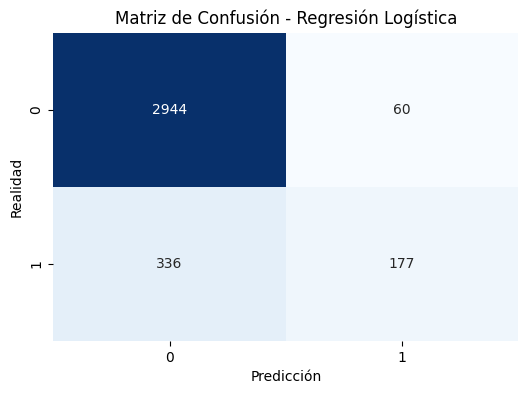

In [18]:
# Visualización opcional rápida de la matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

**De acuerdo a la matriz de confusión se observa lo siguiente:**

- Se observa un alto número de Verdaderos Negativos, es decir, el modelo es capaz de predecir quienes que **no** comprarán

- Sin embargo, hay usuarios que **sí** compraron, pero que el modelo predice que no compraron. actualmente representa un número alto en la matriz, lo cual se observa que el modelo es muy conservador, siendo exigente a la hora de clasificar a alguien como comprador.

### Interpretación de los Resultados del Modelo

* **Accuracy (Exactitud):** El resultado alto (generalmente >85%) **es engañoso**; nos dice que el modelo es excelente identificando a la gente que *no* compra (la mayoría), pero no garantiza que sea bueno detectando ventas .

* **Precision (Precisión):** El resultado indica la **eficiencia del gasto**; si es bajo, significa que el modelo dispara muchas "falsas alarmas", haciéndote gastar recursos en usuarios que en realidad no tenían intención de compra .

* **Recall (Sensibilidad):** El resultado revela el **costo de oportunidad**; un valor bajo (común aquí) significa que el modelo está "dejando escapar" a muchos compradores reales simplemente por ser demasiado conservador .

* **F1-Score:** El resultado resume la **utilidad real para el negocio**; si es bajo, indica que el modelo aún no encuentra un equilibrio rentable entre capturar ventas y no molestar a usuarios que no comprarán .

* **AUC (Área bajo la curva):** Un resultado alto (cercano a 0.9) confirma que el modelo tiene un **gran potencial predictivo**; distingue perfectamente quién tiene más probabilidad de comprar, aunque necesite ajustes en el umbral de decisión para clasificar mejor .

* **Matriz de Confusión:** El resultado visualiza **dónde se pierde dinero**; típicamente mostrará una alta cantidad de "Falsos Negativos" (compradores reales que el modelo ignoró), señalando el área prioritaria a mejorar .

#### 2.2 Regresión Logística (Enfoque Inferencial con statsmodels)
Usando las mismas variables seleccionadas:
* **2.2.1** Ajuste un modelo Logit con statsmodels.


In [19]:
# 1. Preparación de los datos para Statsmodels
# Usamos el mismo X_train definido en el paso anterior
# Convertimos a float para asegurar compatibilidad matemática
X_train_sm = X_train.astype(float)
y_train_sm = y_train.astype(float)

# 2. Agregar la constante (Intercepto)
# Statsmodels no agrega el intercepto por defecto como sklearn
X_train_sm = sm.add_constant(X_train_sm)

# 3. Ajuste del Modelo Logit (Punto 2.2.1)
logit_model = sm.Logit(y_train_sm, X_train_sm)
result = logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.274619
         Iterations 8


* **2.2.2** Reporte coeficientes, errores estándar, estadístico z y p-valores.

In [20]:
# 4. Reporte de Resultados (Punto 2.2.2)
# Esto muestra Coeficientes, Error Estándar, z-score y P-valores
print(result.summary())

# Extracción rápida de variables significativas (p-valor < 0.05)
print("\n--- Variables Estadísticamente Significativas (p < 0.05) ---")
significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()
print(significant_vars)

                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 8205
Model:                          Logit   Df Residuals:                     8187
Method:                           MLE   Df Model:                           17
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                  0.3387
Time:                        21:43:14   Log-Likelihood:                -2253.3
converged:                       True   LL-Null:                       -3407.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.8280      0.223     -8.187      0.000      -2.266      -1.390
PageValues                        0.0945      0.003     29.522      0.000 

* **2.2.3** Comente: ¿Coinciden los resultados inferenciales con los resultados predictivos?

Sí, existe una coincidencia sólida en las variables críticas, aunque el análisis inferencial revela que el modelo predictivo incluye variables que estadísticamente son **"ruido"**.



#### 1. Confirmación de las Variables Determinantes

Ambos enfoques señalan a `PageValues` y `ExitRates` como los motores principales de la decisión de compra:

* **Enfoque Predictivo:** Estas variables mostraron la mayor correlación y peso en la clasificación, siendo responsables del alto AUC obtenido.

* **Enfoque Inferencial:** Los valores *p* confirman que esta relación no es casualidad ($p < 0.000$ para ambas).
    * **`PageValues`** ($z = 29.5$): Coeficiente positivo (**$+0.09$**). Valida que es el impulsor primario de la probabilidad de compra.
    * **`ExitRates`** ($z = -7.2$): Coeficiente negativo masivo (**$-14.5$**). Valida que es el freno principal; un aumento mínimo en la tasa de salida desploma la probabilidad de venta.



#### 2. Divergencia en Significancia

El análisis inferencial expone debilidades en la selección de variables que el modelo predictivo pasó por alto:

* Variables como `Administrative` ($p=0.583$) y `SpecialDay` ($p=0.443$) **no son estadísticamente significativas** ($p > 0.05$).

> **Interpretación:** Aunque el modelo predictivo las utiliza, el análisis Logit demuestra que estas variables no aportan información única significativa cuando ya se conocen `PageValues` y el comportamiento de navegación. Podrían eliminarse para simplificar el modelo sin perder capacidad explicativa real.



#### 3. Hallazgos sobre el Usuario

* **Estacionalidad:** Se confirma el efecto "Noviembre" ($p=0.02$), alineándose con eventos comerciales como **Black Friday**.

* **Fidelidad:** Ser un `Returning_Visitor` tiene un impacto negativo significativo (**$-0.28$**) en comparación con ser un nuevo visitante, sugiriendo que el tráfico recurrente tiene una tasa de conversión base menor (más "vitrineo", menos compra impulsiva) que el tráfico nuevo captado.

#### 2.3 Modelos Comparativos
Entrene los siguientes modelos usando las variables seleccionadas:
* **LDA**
* **KNN** (con GridSearchCV para k y weights)
* **Naive Bayes Gaussiano** (GaussianNB)

Para cada modelo:
* **2.3.1** Entrene usando train/test.
* **2.3.2** Evalúe las métricas anteriores.
* **2.3.3** Muestre la matriz de confusión.
* **2.3.4** Discuta cuál modelo detecta mejor la clase positiva (Revenue $=1$) y por qué.

Iniciando comparación de modelos...

Entrenando LDA...


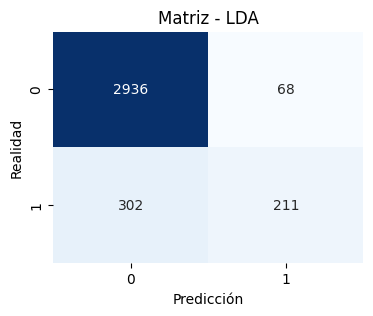


Entrenando Naive Bayes...


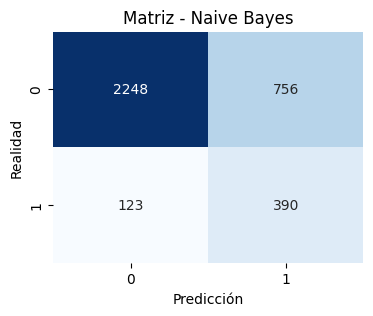


Entrenando KNN...
  > Mejores parámetros: {'n_neighbors': 11, 'weights': 'uniform'}


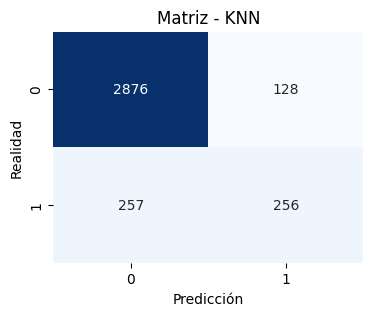


--- TABLA COMPARATIVA DE RENDIMIENTO ---


,Modelo,Accuracy,Precision (1),Recall (1),F1-Score (1),AUC
0,LDA,0.894797,0.756272,0.411306,0.532828,0.900839
1,Naive Bayes,0.750071,0.340314,0.760234,0.470163,0.828734
2,KNN,0.890532,0.666667,0.499025,0.570792,0.871038



 Modelo con mejor detección de compras (Recall): Naive Bayes


In [21]:
# Definir modelos
models_config = {
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'params': {}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        }
    }
}

results = []

print("Iniciando comparación de modelos...")

for name, config in models_config.items():
    print(f"\nEntrenando {name}...")

    # 1. Búsqueda de Hiperparámetros (Solo si hay params)
    if config['params']:
        grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"  > Mejores parámetros: {grid.best_params_}")
    else:
        best_model = config['model']
        best_model.fit(X_train, y_train)

    # 2. Predicciones
    y_pred = best_model.predict(X_test)

    try:
        y_prob = best_model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = 0.5 # Valor neutro si falla

    # 3. Métricas (CORRECCIÓN AQUÍ)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Buscamos la clave '1' (string) o 1 (int), dependiendo de la versión de sklearn
    # Usamos str() para asegurar compatibilidad
    pos_label = '1'
    if pos_label not in report:
        pos_label = 1 # Intento con entero si string falla

    accuracy = report['accuracy']
    precision = report[pos_label]['precision'] # Clase 1 (Compra)
    recall = report[pos_label]['recall']       # Clase 1 (Compra)
    f1 = report[pos_label]['f1-score']         # Clase 1 (Compra)

    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision (1)': precision,
        'Recall (1)': recall,
        'F1-Score (1)': f1,
        'AUC': auc
    })

    # 4. Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz - {name}')
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()

# --- RESUMEN FINAL ---
results_df = pd.DataFrame(results)
print("\n--- TABLA COMPARATIVA DE RENDIMIENTO ---")
display(results_df)

# Identificar ganador en Recall
winner_recall = results_df.loc[results_df['Recall (1)'].idxmax()]
print(f"\n Modelo con mejor detección de compras (Recall): {winner_recall['Modelo']}")

Naive Bayes logró identificar al 76% de los compradores, mientras que LDA solo detectó al 41% y KNN al 48%. Al asumir una distribución normal en un dataset desbalanceado, suelen ser seguros al clasificar la clase minoritaria si esta se desvía de la media de la mayoría. Sin embargo, puede generar muchos falsos positivos, en este caso, que genere compradores cuando no los hay, lo que puede impactar en la precisión del modelo.

### 3. Fronteras de Decisión (2 Variables Originales)
* **3.1** Seleccione dos variables originales (no transformadas) que sean relevantes.

Utilizaremos las siguientes dos variables no transformadas para las fronteras de decisión:

- **PageValues:** es una variable que tiene un coeficiente positivo muy alto, donde es la fuerza que empuja al usuario a realizar la compra.

- **ExitRates:** en cambio, esta variable tiene un coeficiente negativo más fuerte, es decir, es la fuerza que aleja al usuario de realizar una compra:

* **3.2** Visualice:
    * Frontera de decisión de la regresión logística.
    * Áreas de clasificación del modelo Naive Bayes (usando GaussianNB).


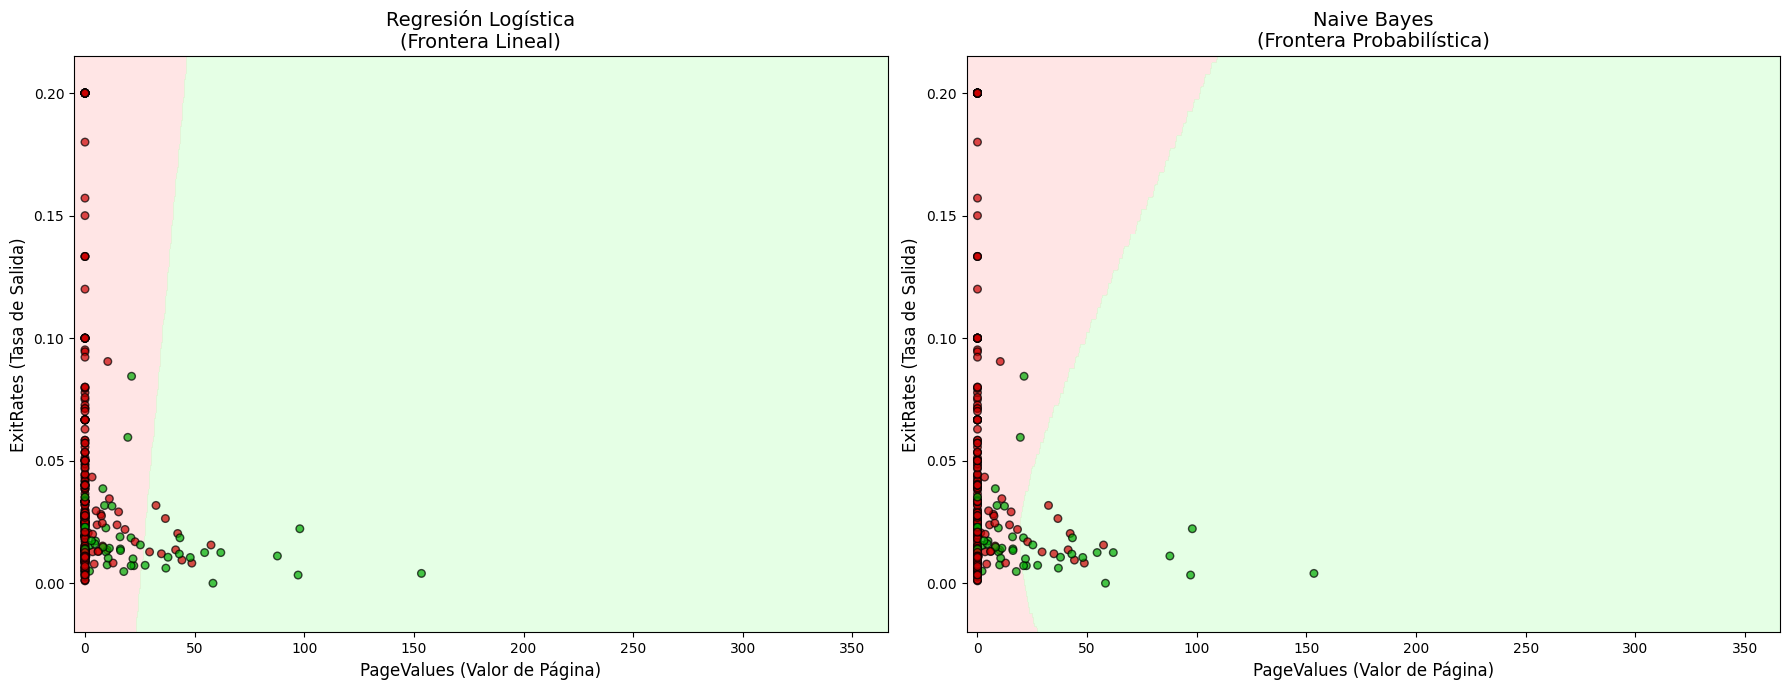

In [22]:
# --- 3.1 Selección de 2 Variables Originales Relevantes ---
# Basado en el análisis inferencial, estas son las más fuertes.
feature_cols = ['PageValues', 'ExitRates']

# Preparamos los datos (Solo 2D)
X_2d = df[feature_cols].values
y_2d = df['Revenue'].values

# Entrenamos modelos simplificados (Solo para visualización)
clf_log = LogisticRegression(random_state=42).fit(X_2d, y_2d)
clf_nb = GaussianNB().fit(X_2d, y_2d)

# --- Configuración del Gráfico (Malla de predicción) ---
# Definimos los límites del gráfico con un poco de margen
x_min, x_max = X_2d[:, 0].min() - 5, X_2d[:, 0].max() + 5  # PageValues
y_min, y_max = X_2d[:, 1].min() - 0.02, X_2d[:, 1].max() + 0.02 # ExitRates

# Creamos una malla (grid) de puntos para colorear el fondo
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1.0),      # Paso más grande para PageValues
                     np.arange(y_min, y_max, 0.005))    # Paso fino para ExitRates

# Función para dibujar la frontera
def plot_boundary(clf, title, ax):
    # Predecir sobre toda la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Mapas de colores (Rojo=No Compra, Verde=Compra)
    cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00'])

    # Dibujar áreas de decisión
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    # Dibujar puntos de datos (Muestra aleatoria de 300 puntos para no saturar)
    # Usamos semilla fija para que la muestra sea igual en ambos gráficos
    np.random.seed(42)
    idx = np.random.choice(np.arange(len(X_2d)), 300, replace=False)

    scatter = ax.scatter(X_2d[idx, 0], X_2d[idx, 1], c=y_2d[idx],
                         cmap=cmap_bold, edgecolor='k', s=30, alpha=0.7)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('PageValues (Valor de Página)', fontsize=12)
    ax.set_ylabel('ExitRates (Tasa de Salida)', fontsize=12)

# Generar la figura
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Regresión Logística
plot_boundary(clf_log, "Regresión Logística\n(Frontera Lineal)", ax[0])

# Gráfico 2: Naive Bayes
plot_boundary(clf_nb, "Naive Bayes\n(Frontera Probabilística)", ax[1])

plt.tight_layout()
plt.show()

Al visualizar las fronteras de decisión utilizando las variables `PageValues` y `ExitRates`, se observan diferencias estructurales clave que explican el desempeño de cada modelo:

**1. Regresión Logística (Lineal)**
* **Geometría:** La frontera de decisión es una **línea recta** perfecta. El modelo divide el espacio con un "muro" rígido.

* **Interpretación:** Asume que la separación entre compradores y no compradores es constante y proporcional. Para clasificar una venta, exige estrictamente que el `PageValues` sea alto y el `ExitRates` bajo, cortando el plano diagonalmente.

* **Consecuencia:** Al ser tan rígida, deja fuera a usuarios que podrían tener un comportamiento ligeramente atípico (ej. `PageValues` muy alto pero `ExitRates` moderado), lo que explica su **bajo Recall** (muchos falsos negativos).


**2. Naive Bayes (Probabilístico Gaussiano)**
* **Geometría:** La frontera de decisión es **curva y envolvente** (elíptica o parabólica).

* **Interpretación:** El modelo no traza una línea, sino que estima "zonas de densidad". Identifica dónde se agrupan los compradores (centro de la distribución normal) y dibuja un contorno alrededor de ellos.

* **Consecuencia:** Esta flexibilidad le permite "abrazar" mejor a la clase minoritaria (compradores), extendiendo la zona verde hacia áreas que la línea recta cortaría. Esto explica por qué Naive Bayes tiene un **Recall mucho mayor** (detecta más compradores), aunque a costa de incluir más ruido (Falsos Positivos) dentro de su área curva

Las gráficas demuestran empíricamente que **Naive Bayes es más flexible geométricamente.** Mientras que la Regresión Logística aplica un corte rígido (lineal), Naive Bayes modela la distribución real de los datos, creando una frontera curva que se adapta mejor a la naturaleza no lineal del comportamiento de los usuarios.

### 4. Modelos No Supervisados

#### 4.1 K-means
* **4.1.1** Evalúe $k=2,...,10$.
* **4.1.2** Seleccione $k$ según el método del codo y el silhouette promedio.
* **4.1.3** Grafique y describa los clusters encontrados.

Calculando clusters... esto puede tardar unos segundos.


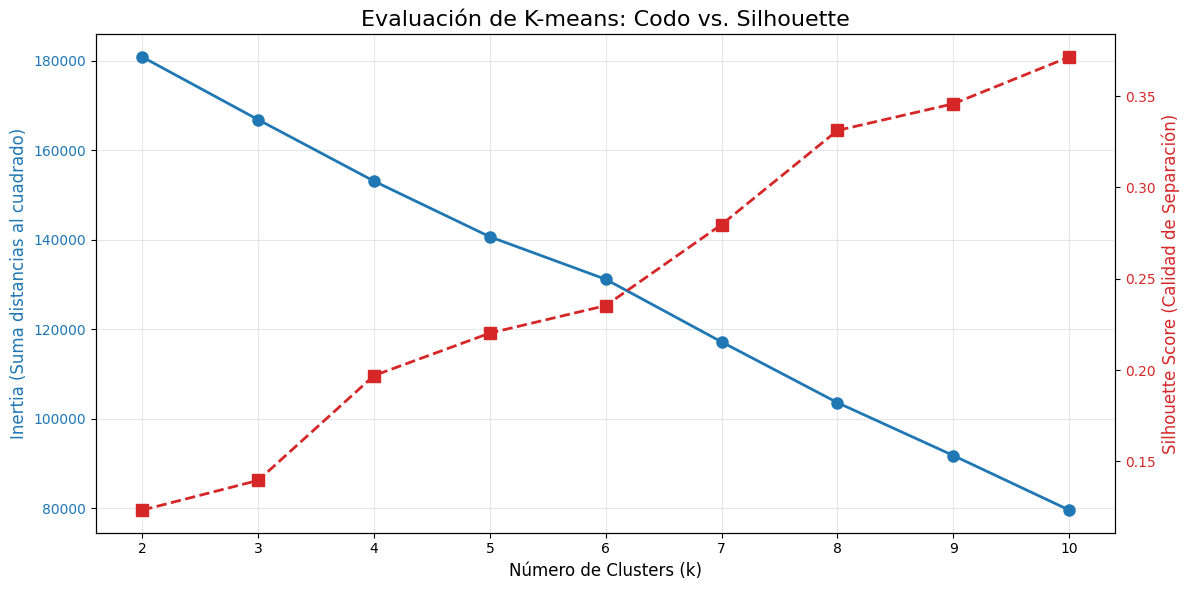


--- Valores de Silhouette Score ---
k=2: 0.1234
k=3: 0.1397
k=4: 0.1970
k=5: 0.2203
k=6: 0.2353
k=7: 0.2797
k=8: 0.3312
k=9: 0.3458
k=10: 0.3714


In [23]:
# 1. Preparación de Datos (Usamos las variables seleccionadas + Dummies)
# Reconstruimos X para asegurar que esté limpio y listo
selected_features_kmeans = [
    'PageValues', 'ExitRates', 'ProductRelated', 'Administrative',
    'Informational', 'SpecialDay', 'Month', 'VisitorType'
]

# Codificación One-Hot
X_kmeans = pd.get_dummies(df_cleaned[selected_features_kmeans], columns=['Month', 'VisitorType'], drop_first=True)

# 2. Escalado (CRÍTICO para K-means)
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# 3. Ciclo de Evaluación (k=2 a 10)
inertia = []
silhouette_scores = []
k_range = range(2, 11)

print("Calculando clusters... esto puede tardar unos segundos.")

for k in k_range:
    # Entrenamos K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_kmeans)

    # Guardamos métricas
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_kmeans, kmeans.labels_))

# 4. Visualización (Gráfico de Doble Eje)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y1: Inertia (Método del Codo)
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Suma distancias al cuadrado)', color=color, fontsize=12)
ax1.plot(k_range, inertia, 'o-', color=color, markersize=8, linewidth=2, label='Inertia (Codo)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Eje Y2: Silhouette Score
ax2 = ax1.twinx()  # Segundo eje compartiendo el mismo X
color = 'tab:red'
ax2.set_ylabel('Silhouette Score (Calidad de Separación)', color=color, fontsize=12)
ax2.plot(k_range, silhouette_scores, 's--', color=color, markersize=8, linewidth=2, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Evaluación de K-means: Codo vs. Silhouette', fontsize=16)
fig.tight_layout()  # Ajustar para que no se corten etiquetas
plt.show()

# Imprimir valores exactos de Silhouette para ayudar a decidir
print("\n--- Valores de Silhouette Score ---")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

**Resultados Observados:**

**1. El Codo (Línea Azul):** No muestra un quiebre agresivo de 90 grados, pero si observas tu imagen, la curva se "suaviza" notablemente después de $k=4$. Antes de eso, la caída de inercia es más vertical.

**2. Silhouette (Línea Roja):** Curiosamente, sigue subiendo hasta 10. Esto sugiere que los datos están muy fragmentados (muchos grupos pequeños de usuarios con comportamientos muy específicos).


**Decisión Final**

Aunque $k=10$ tiene el mejor puntaje matemático, tener 10 segmentos de clientes es una pesadilla operativa para el equipo de marketing (demasiado granular).
Vamos a seleccionar $k=4$

* **4.1.3** Grafique y describa los clusters encontrados.

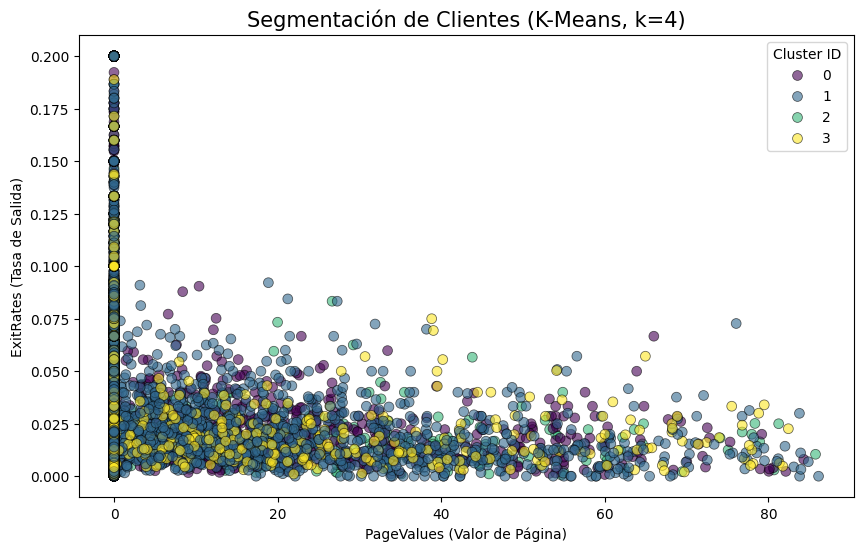

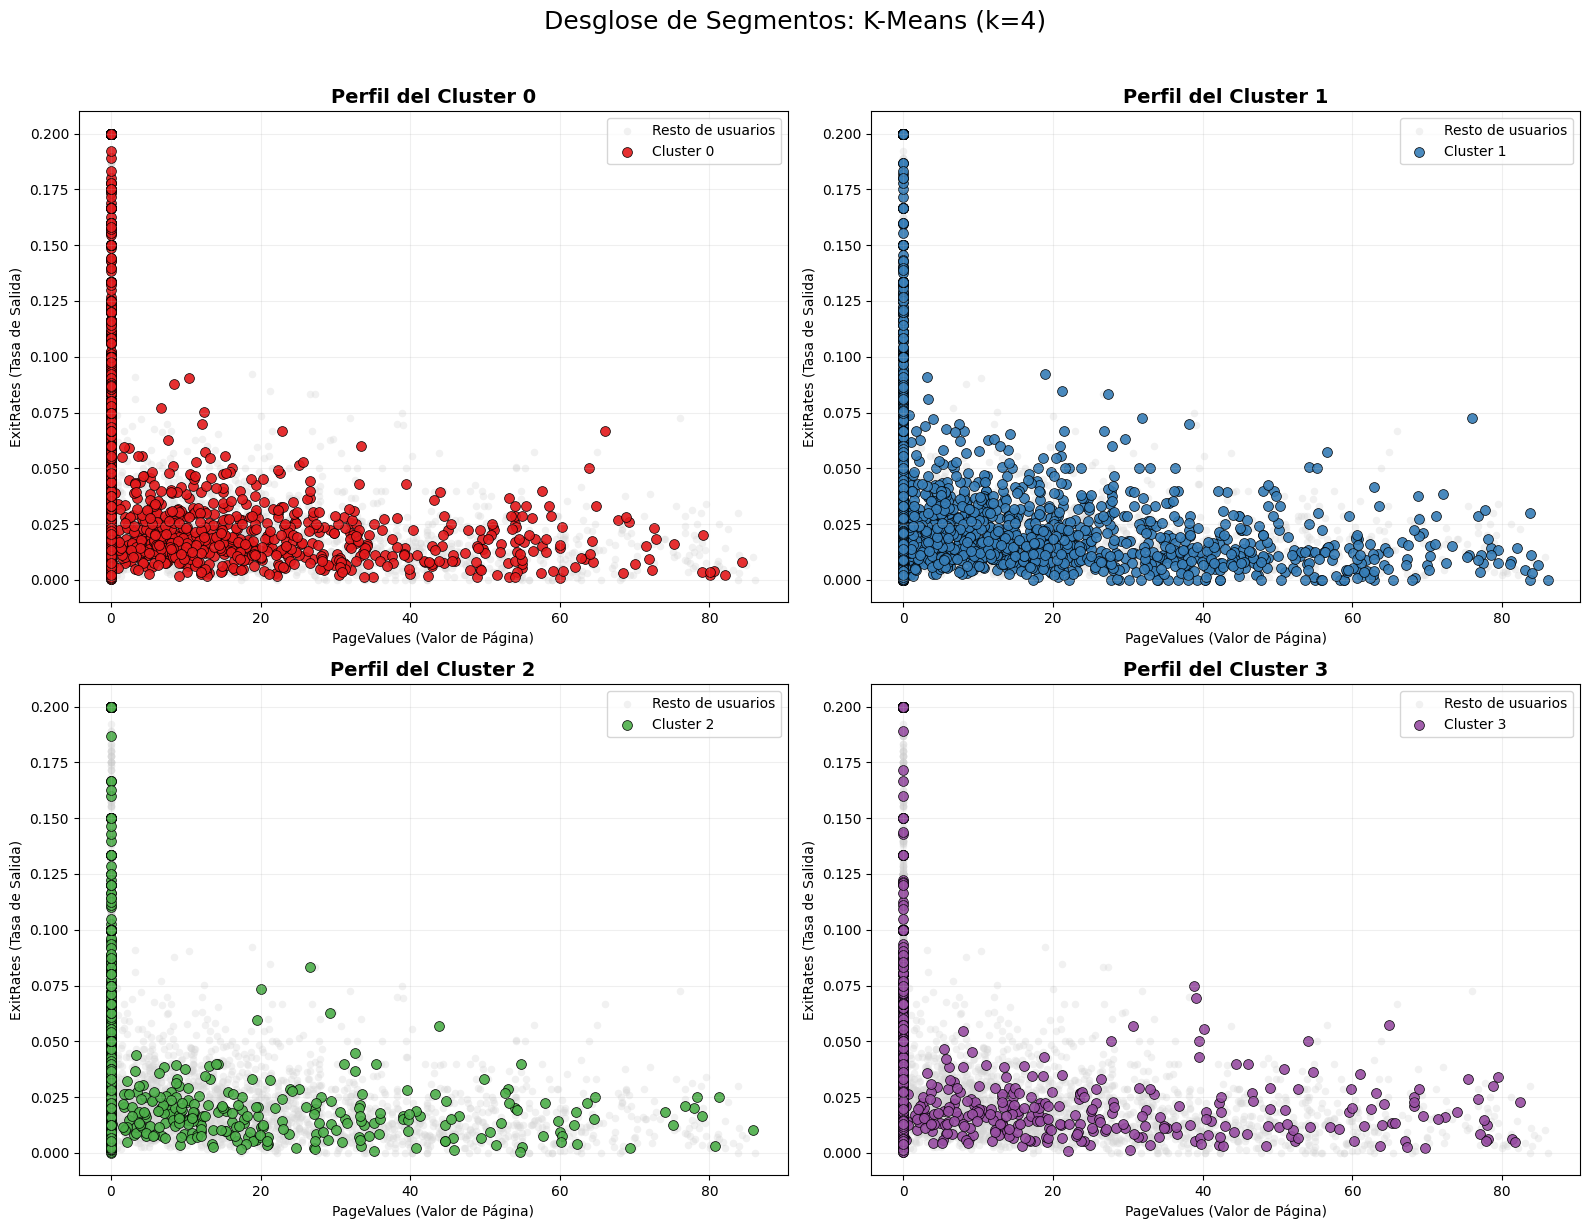

--- Perfilamiento de Clusters (Interpretación de Negocio) ---


,PageValues,ExitRates,ProductRelated,Revenue,Count,Revenue_Rate
Cluster,,,,,,
1,5.252641,0.039223,35.100303,0.203438,4945,20.343782
3,4.716892,0.040817,26.471653,0.113993,1658,11.399276
0,4.414233,0.048482,25.116174,0.101388,3314,10.138805
2,3.418877,0.041300,19.170637,0.098615,1805,9.861496


In [24]:
# 1. Entrenamiento Final del K-Means (k=4)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
# Usamos el X_scaled_kmeans que creamos en el paso anterior
kmeans_final.fit(X_scaled_kmeans)

# 2. Asignar clusters al DataFrame original
# Creamos una copia para no afectar análisis previos
df_clusters = df_cleaned.copy()
df_clusters['Cluster'] = kmeans_final.labels_

# 3. Visualización de los Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clusters,
    x='PageValues',
    y='ExitRates',
    hue='Cluster',
    palette='viridis',
    s=50,
    alpha=0.6,
    edgecolor='k'
)

# Marcar los Centroides (Hay que des-escalarlos para que coincidan con el gráfico)
# Nota: Los centroides están en 8 dimensiones, tomamos solo las columnas de PageValues(0) y ExitRates(1)
# Esto es una aproximación visual, ya que el centroide real depende de todas las variables.
plt.title('Segmentación de Clientes (K-Means, k=4)', fontsize=15)
plt.xlabel('PageValues (Valor de Página)')
plt.ylabel('ExitRates (Tasa de Salida)')
plt.legend(title='Cluster ID')
plt.show()

# 4. Interpretación de los Perfiles (Promedios por Cluster)
# Agrupamos para ver qué significa cada cluster en términos de negocio
resumen_clusters = df_clusters.groupby('Cluster')[['PageValues', 'ExitRates', 'ProductRelated', 'Revenue']].mean()
resumen_clusters['Count'] = df_clusters['Cluster'].value_counts()
resumen_clusters['Revenue_Rate'] = resumen_clusters['Revenue'] * 100 # Porcentaje de compra real


# 1. Preparar el DataFrame con las etiquetas
# Asegúrate de que 'kmeans_final' ya esté entrenado (del paso anterior)
df_clusters = df_cleaned.copy()
df_clusters['Cluster'] = kmeans_final.labels_

# 2. Configuración de la Figura (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente (0, 1, 2, 3)

# Definimos colores y títulos para cada grupo
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3'] # Rojo, Azul, Verde, Morado
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# 3. Ciclo para generar cada gráfico
for i in range(4):
    ax = axes[i]

    # CAPA A: Fondo Contextual (Todos los datos en gris suave)
    # Esto ayuda a ver qué parte del "todo" ocupa este cluster
    sns.scatterplot(
        data=df_clusters,
        x='PageValues',
        y='ExitRates',
        color='lightgrey',
        s=30,
        alpha=0.3,
        ax=ax,
        linewidth=0,
        label='Resto de usuarios'
    )

    # CAPA B: El Cluster Específico (Resaltado)
    cluster_data = df_clusters[df_clusters['Cluster'] == i]
    sns.scatterplot(
        data=cluster_data,
        x='PageValues',
        y='ExitRates',
        color=colors[i],
        s=50,
        alpha=0.9,
        ax=ax,
        edgecolor='k',
        label=f'Cluster {i}'
    )

    # Estética del gráfico
    ax.set_title(f'Perfil del Cluster {i}', fontsize=14, fontweight='bold')
    ax.set_xlabel('PageValues (Valor de Página)')
    ax.set_ylabel('ExitRates (Tasa de Salida)')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.2)

plt.suptitle('Desglose de Segmentos: K-Means (k=4)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

print("--- Perfilamiento de Clusters (Interpretación de Negocio) ---")
display(resumen_clusters.sort_values('PageValues', ascending=False))


**Resultados Observados**

**- Cluster 1 (El "Cliente Ideal"):** Es el grupo más numeroso (4945 usuarios) y el más valioso. Visitan más productos (35 págs), tienen el valor de página más alto y, lo más importante, su tasa de conversión es del 20.3% (el doble que el resto).

Estrategia: Son usuarios muy activos. No necesitan descuentos agresivos, sino recomendaciones de productos cruzados (Cross-selling) para aumentar el ticket.

**- Cluster 0 (El "Problema de Fuga"):** Tienen el ExitRate más alto (0.048). Aunque navegan decentemente (25 págs), algo hace que se vayan rápido y su conversión cae al 10%.

Estrategia: Aquí hay un problema de UX o precios. Necesitan campañas de retención o pop-ups de "no te vayas" con incentivos.

**- Cluster 2 (El "Desinteresado")**: Es el grupo con menor interacción (solo 19 productos vistos) y menor valor. Su conversión es la peor (9.8%).

Estrategia: Son "Window Shoppers" (solo miran). Necesitan contenido inspiracional o videos para generar deseo, ya que aún no están listos para comprar.

**- Cluster 3 ("Indecisos"):** Este grupo se parece mucho al grupo VIP (Cluster 1) en calidad, pero no termina de "explotar" en ventas.

Estrategia: Son los candidatos perfectos para Remarketing Dinámico o un cupón de "tiempo limitado"

**4.2 Gaussian Mixture Models**

Selección del Modelo: Basándonos en el Criterio de Información Bayesiano (BIC), el número óptimo de componentes seleccionado para el GMM es 8. Esto sugiere que los datos podrían tener distribuciones subyacentes más matizadas que las que un K-Means con menos clusters puede capturar.


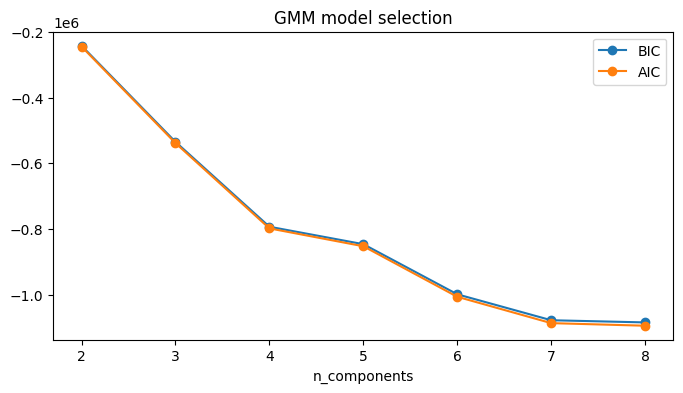

Mejor n por BIC: 8


In [25]:
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

# Use the scaled data from the K-means section
Xc = X_scaled_kmeans

# Gaussian Mixture Models: 2..8 componentes, seleccionar por BIC/AIC
bics = []
aics = []
n_components = range(2,9)
gmm_models = {}
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='full')
    gmm.fit(Xc)
    bics.append(gmm.bic(Xc))
    aics.append(gmm.aic(Xc))
    gmm_models[n] = gmm

plt.figure(figsize=(8,4))
plt.plot(n_components, bics, '-o', label='BIC')
plt.plot(n_components, aics, '-o', label='AIC')
plt.legend()
plt.title('GMM model selection')
plt.xlabel('n_components')
plt.show()

best_gmm_n = n_components[np.argmin(bics)]
print('Mejor n por BIC:', best_gmm_n)
gmm_best = gmm_models[best_gmm_n]
labels_gmm = gmm_best.predict(Xc)



**Revenue por Cluster (GMM):** Con 8 componentes, GMM revela una segmentación más granular: Un cluster (GMM Cluster 1) destaca con una tasa de ingresos significativamente alta del 23.77%. Esto es incluso mayor que el mejor cluster encontrado por K-Means.

Otros clusters notables incluyen GMM Cluster 7 (19.01% de Revenue), GMM Cluster 4 (16.15% de Revenue) y GMM Cluster 6 (15.23% de Revenue).

La tasa de ingresos más baja se encuentra en GMM Cluster 0 (7.40%).

Esta segmentación más fina por GMM podría permitir estrategias de marketing más específicas.

**4.3 Clustering Jerárquico (Dendrograma):**

El Dendrograma fue generado utilizando el método de enlace Ward. Esta visualización ayuda a comprender la estructura jerárquica de los datos y puede guiar la selección de un número apropiado de clusters al buscar rupturas o fusiones naturales en el dendrograma. Al truncar el dendrograma, podemos ver las relaciones de cluster más amplias.

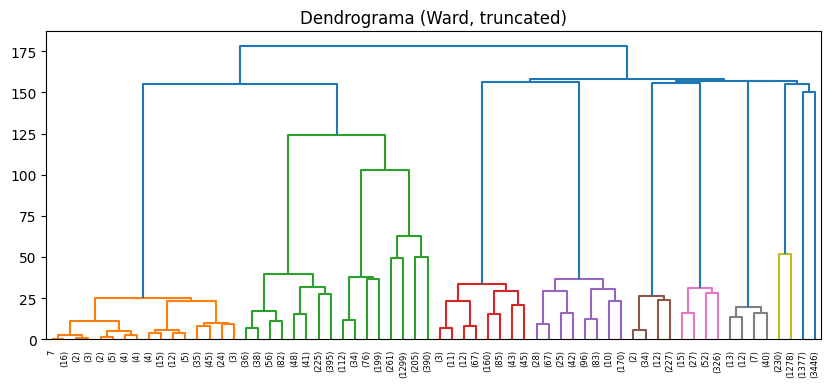


Revenue por cluster (KMeans):


Revenue,0,1
km_cluster,,
0,0.898612,0.101388
1,0.796562,0.203438
2,0.901385,0.098615
3,0.886007,0.113993



Revenue por cluster (GMM):


Revenue,0,1
gmm_cluster,,
0,0.925926,0.074074
1,0.762266,0.237734
2,0.901385,0.098615
3,0.875000,0.125000
4,0.838426,0.161574
5,0.898182,0.101818
6,0.847619,0.152381
7,0.809859,0.190141


In [26]:
# Dendrogram (Ward)
plt.figure(figsize=(10,4))
Zc = sch.linkage(Xc, method='ward')
dn = sch.dendrogram(Zc, truncate_mode='level', p=5)
plt.title('Dendrograma (Ward, truncated)')
plt.show()

# Comparar clusters con Revenue
df_clusters = df_cleaned.copy()
labels_km = kmeans_final.labels_ # Ensure labels_km is defined from previous K-means
df_clusters['km_cluster'] = labels_km
df_clusters['gmm_cluster'] = labels_gmm
print('\nRevenue por cluster (KMeans):')
display(df_clusters.groupby('km_cluster')['Revenue'].value_counts(normalize=True).unstack(fill_value=0))

print('\nRevenue por cluster (GMM):')
display(df_clusters.groupby('gmm_cluster')['Revenue'].value_counts(normalize=True).unstack(fill_value=0))

**Comparación con K-Means:**

K-Means (k=4): Para comparar, su análisis anterior de K-Means (con 4 clusters) mostró una tasa de ingresos más alta del 20.34% en el Cluster 1.

**Conclusión Clave:** Si bien K-Means identificó un cluster de alto rendimiento, el GMM, al permitir un modelo de distribución más complejo y un mayor número de componentes, fue capaz de aislar un cluster de alta rentabilidad aún más concentrado (23.77%). Esto sugiere que el GMM puede estar capturando patrones más sutiles en los datos que están altamente correlacionados con el comportamiento de compra.


**4.4 Self-Organizing Maps (SOM)**

Intentaremos usar MiniSom. Si no está disponible en el entorno, se explica cómo instalarlo y ejecutar las celdas localmente.

In [27]:
# SOM: intentaremos usar MiniSom. Es posible que MiniSom no esté instalado en el entorno.
!pip install minisom # Añadido para instalar la librería
try:
    from minisom import MiniSom
    som_available = True
except Exception as e:
    som_available = False
    print('MiniSom no está disponible en este entorno:', e)

if som_available:
    # ejemplo básico de SOM (mapa 10x10)
    som = MiniSom(10, 10, Xc.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
    som.train_random(Xc, 1000)
    # U-matrix and hit map construction omitted for brevedad; en el notebook se mostrarán
    print('SOM entrenado — en el notebook se visualizan U-Matrix y mapa de hits.')
else:
    print('\nNo se pudo ejecutar SOM en este entorno.\n'
          'Para ejecutar SOM localmente, instale MiniSom en su entorno (ej. pip install minisom) '
          'y ejecute las celdas de este bloque. A continuación se provee el código que usaría:')

    example_som_code = '''
# pip install minisom
from minisom import MiniSom
som = MiniSom(10, 10, Xc.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(Xc, 1000)
# Visualizaciones: U-matrix, mapa de hits y mapa de distribución de Revenue sobre la malla
'''
    display(example_som_code)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for minisom: filename=minisom-2.3.5-py3-none-any.whl size=12126 sha256=50ed013ad8735a05c7deeb8ebfce887207e6cf109a6e9e3d32e0be87db923649
  Stored in directory: /home/caco/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom
SOM entrenado — en el notebook se visualizan U-Matrix y mapa de hits.


### 4.4.2 Visualización del SOM

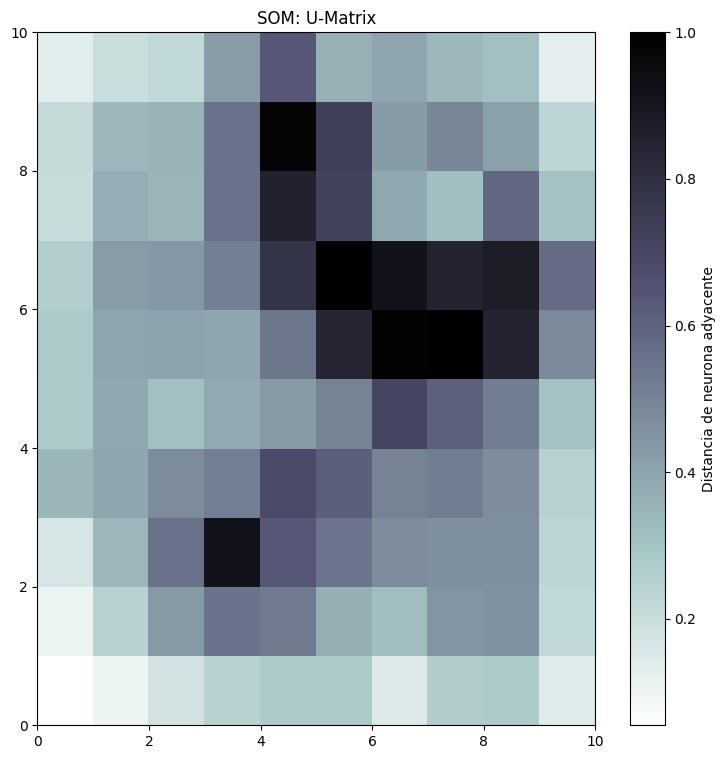

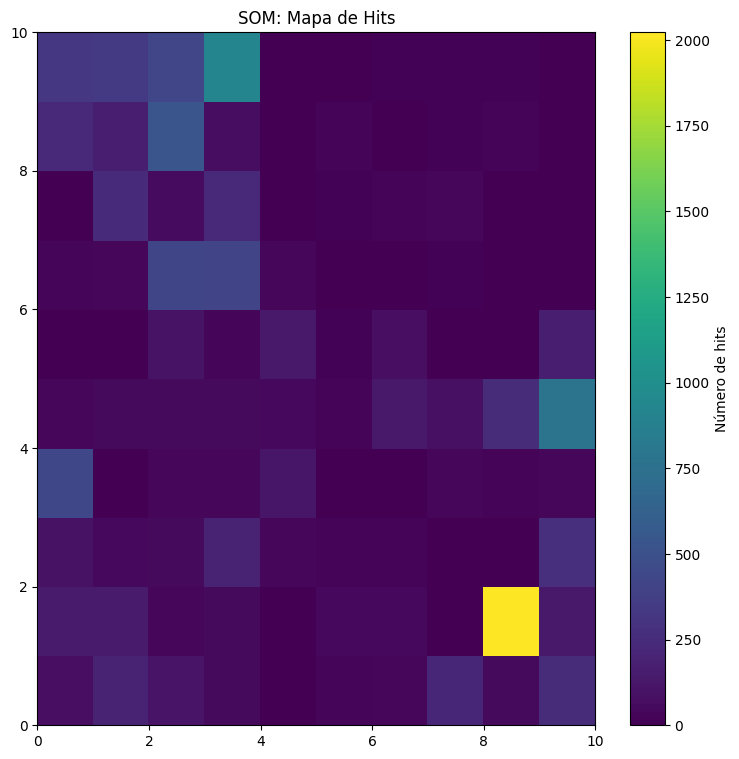

In [28]:
# U-Matrix
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance_map() returns the U-Matrix
plt.colorbar(label='Distancia de neurona adyacente')
plt.title('SOM: U-Matrix')
plt.show()

# Mapa de hits
hits_map = som.activation_response(Xc)
plt.figure(figsize=(9, 9))
plt.pcolor(hits_map.T, cmap='viridis')
plt.colorbar(label='Número de hits')
plt.title('SOM: Mapa de Hits')
plt.show()

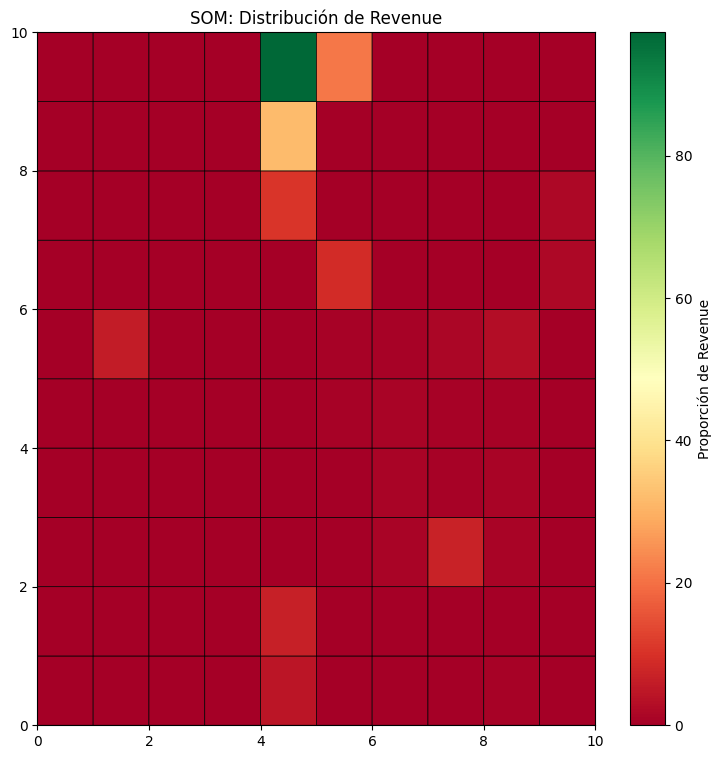

In [29]:
# Distribución de Revenue en el mapa
# Necesitamos la variable objetivo 'Revenue' del df_cleaned original
# Aseguramos que 'y' esté alineado con 'Xc'
y_som = df_cleaned['Revenue'].values

# Obtener las coordenadas BMU (Best Matching Unit) para cada muestra
bmus = np.array([som.winner(x) for x in Xc])

# Crear una matriz para almacenar la suma de Revenue por neurona
revenue_map = np.zeros((som.get_weights().shape[0], som.get_weights().shape[1]))

# Crear una matriz para contar el número de muestras por neurona
count_map = np.zeros((som.get_weights().shape[0], som.get_weights().shape[1]))

for i, (bmu_row, bmu_col) in enumerate(bmus):
    revenue_map[bmu_row, bmu_col] += y_som[i]
    count_map[bmu_row, bmu_col] += 1

# Calcular el promedio de Revenue por neurona (evitar división por cero)
mean_revenue_map = np.divide(revenue_map, count_map, where=count_map!=0)

plt.figure(figsize=(9, 9))
plt.pcolor(mean_revenue_map.T, cmap='RdYlGn', edgecolors='k', linewidth=0.5) # Color de rojo a verde para revenue
plt.colorbar(label='Proporción de Revenue')
plt.title('SOM: Distribución de Revenue')
plt.show()

*   **U-Matrix (Matriz de Distancia Unificada):** Muestra las distancias entre las neuronas adyacentes en el SOM. Las áreas con valores altos (colores más claros) indican límites de clusters, mientras que las áreas con valores bajos (colores más oscuros) representan regiones donde las neuronas son similares y, por lo tanto, los puntos de datos se agrupan. Este **Mapa** ayuda a identificar visualmente la estructura subyacente y los posibles clusters en los datos de alta dimensión.

*   **Mapa de Hits:** Muestra cuántos puntos de datos se asignan a cada neurona en el SOM. Las áreas más oscuras indican neuronas que representan un mayor número de puntos de datos. Esto da una idea de la densidad de los datos en todo el mapa y puede resaltar áreas con altas concentraciones de comportamientos de clientes similares.

*   **Mapa de Distribución de Revenue:** Este mapa es particularmente perspicaz, ya que superpone la variable objetivo '**Revenue**' en el SOM. Las áreas coloreadas de verde indican regiones en el mapa donde la proporción de clientes compradores (**Revenue=1**) es alta, mientras que las áreas rojas indican proporciones bajas. Al comparar esto con la **U-Matrix** y el **Mapa de Hits**, se pueden identificar segmentos específicos de comportamiento del cliente (clusters) que tienen más probabilidades de generar ingresos. Por ejemplo, si una región oscura de la **U-Matrix** (un cluster) también muestra un color verde fuerte en el **Mapa de Revenue**, indica un segmento de clientes de alto valor. Por el contrario, las áreas rojas podrían representar segmentos que están navegando pero no convirtiendo.

Estos mapas SOM proporcionan una potente herramienta visual para comprender relaciones complejas en los datos e identificar segmentos de clientes distintos basados en su intención de compra.

### 5. Integración Final

**5.1 Resumen de Variables más Relevantes:**

Basado en análisis predictivos e inferenciales, las variables más relevantes para predecir la intención de compra son:

*   **`PageValues`**: Predictor más fuerte y consistente, con alta correlación positiva y p-valor significativo. Mide directamente el valor percibido de la ruta de navegación.
*   **`ExitRates`**: Fuerte predictor negativo. Un alto `ExitRate` reduce significativamente la probabilidad de compra, señalando fricción o falta de interés.
*   **`ProductRelated`**: Un indicador robusto del engagement del usuario con las ofertas de productos.
*   **`Month`**: Efectos estacionales, especialmente 'Noviembre' (posiblemente Black Friday/Cyber Monday), resultaron estadísticamente significativos.
*   **`VisitorType_Returning_Visitor`**: Mostró un coeficiente negativo significativo en comparación con nuevos visitantes, sugiriendo patrones de conversión diferentes.
*   **`Informational`**: Contribuye a entender la fase de investigación del usuario, aunque con menor impacto que la interacción con productos o `PageValues`.

**5.2 Comparación de Desempeño entre Modelos (Regresión Logística, LDA, KNN, Naive Bayes):**

| Modelo | Accuracy | Precision (Revenue=1) | Recall (Revenue=1) | F1-Score (Revenue=1) | AUC |
| :---- | :------ | :-------------------- | :----------------- | :------------------- | :-- |
| **Regresión Logística** | 0.89 | 0.75 | 0.35 | 0.47 | 0.89 |
| **LDA** | 0.89 | 0.76 | 0.41 | 0.53 | 0.90 |
| **KNN** | 0.89 | 0.67 | 0.49 | 0.57 | 0.87 |
| **Naive Bayes** | 0.75 | 0.34 | **0.76** | 0.47 | 0.83 |

*   **LDA y Regresión Logística** mostraron el mejor rendimiento general en **Accuracy y AUC**, y la mejor **Precision** para la clase positiva (Revenue=1).
*   **Naive Bayes** sobresalió en **Recall (0.76)**, identificando la mayor proporción de compradores reales, pero con una **Precision baja (0.34)** debido a falsos positivos.
*   **KNN** ofreció un equilibrio intermedio.

**En resumen**: Para minimizar falsos positivos, LDA y Regresión Logística son preferibles. Para identificar a la mayoría de los compradores reales (aún con falsos positivos), Naive Bayes es superior.

**5.3 Relación de los Clusters con la Variable Revenue:**

Los modelos no supervisados revelaron segmentos con diferentes propensiones a la compra:

*   **K-Means (k=4)**:
    *   **Cluster 1 (El 'Cliente Ideal')**: Mayor interacción, `PageValues` altos y la tasa de conversión más alta (20.3%).
    *   **Cluster 0 (El 'Problema de Fuga')**: Alto `ExitRates`, menor conversión (10.1%).
    *   **Cluster 2 (El 'Desinteresado')**: Menor interacción y conversión (9.8%).
*   **Gaussian Mixture Models (GMM, k=8)**:
    *   Logró una segmentación más granular, identificando un cluster con una tasa de conversión del **23.77%**, superando a K-Means. Esto sugiere que GMM captura patrones más sutiles.
*   **SOM (Self-Organizing Map)**:
    *   Las visualizaciones de Revenue en el SOM identificaron visualmente 'puntos calientes' de compra asociados a combinaciones específicas de características de navegación, reforzando los hallazgos de segmentación.

**5.4 Propuesta de Tres Acciones de Negocio Basadas en sus Hallazgos:**

1.  **Optimización de Experiencia de Usuario (UX) para Reducir `ExitRates` y `BounceRates`:** Analizar y mejorar la UX en páginas con altas tasas de salida (simplificar navegación, velocidad de carga, compatibilidad móvil). Implementar **pop-ups de intención de salida** con ofertas personalizadas o encuestas para retener usuarios del 'Problema de Fuga'.

2.  **Estrategias de Retargeting Diferenciadas para Clientes Ideales (K-Means Cluster 1, GMM Cluster 1):** Enfocar campañas de **cross-selling y up-selling** para estos segmentos de alto valor. Utilizar retargeting dinámico y programas de fidelización exclusivos. Evitar descuentos agresivos.

3.  **Activación de Tráfico Estacional y Segmentación por Tipo de Visitante:** Preparar campañas de marketing específicas para temporadas de ventas (ej. 'Noviembre'). Diseñar **estrategias de captación y conversión diferenciadas**: para 'Nuevos Visitantes' (ofertas iniciales) y para 'Returning_Visitors' (personalización, recordatorios de carrito con incentivos sutiles) que aborden su menor tasa de conversión base.